# Insurance Claims- Fraud Detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [50]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have imported all necessary libraries.

In [51]:
#Importing Dataset
df= pd.read_csv('Automobile_insurance_fraud.csv')

We have loaded dataset here.

In [52]:
#Checking Dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


This is our dataset on which we would do different operations. 

Let's check the features present in our data and then we will look at their data types.

In [54]:
#Checking Dimension of Dataframe
df.ndim

2

We can notice that our dataset dimension is 2.

In [55]:
#Checking Shape of Dataframe
df.shape

(1000, 40)

We have 39 independent variables and 1 target variable. We will predict the fraud_reported with the help of model built using the train data. Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [56]:
#Checking Datatypes of columns of Dataframe
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

These are data types of columns of our dataset.

In [57]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From here we can notice that whole _c39 column is blank, means all values in _c39 is null values, that's why this column needs to remove.

In [58]:
#Checking different values total counts in the column
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

We can notice that police_report_available column has 343 ? value which has no meaning and needs to replace.

In [59]:
#Replacing value in the column
df['police_report_available']=df['police_report_available'].replace('?','NO')

Here we have replaced all ? values in the column by No.

In [10]:
#Checking different values total counts in the column
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Now there's no ? values in the column.

In [11]:
#Checking different values total counts in the column
df['auto_make'].value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

Here we are Checking total counts of different values in the column.

In [12]:
#Checking different values total counts in the column
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
E400              27
F150              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Maxima            24
Escape            24
X5                23
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Impreza           20
TL                20
CRV               20
Corolla           20
ML350             20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

Here we are Checking total counts of different values in the column.

In [13]:
#Checking different values total counts in the column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Here we are Checking total counts of different values in the column.

In [14]:
#Checking different values total counts in the column
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

Here we are Checking total counts of different values in the column.

In [15]:
#Checking different values total counts in the column
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

Here we are Checking total counts of different values in the column.

In [16]:
#Checking different values total counts in the column
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

Here we are Checking total counts of different values in the column.

In [17]:
#Checking different values total counts in the column
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

Here we are Checking total counts of different values in the column.

In [60]:
#Droping unnecessary columns
df=df.drop(['policy_bind_date','auto_year','_c39','incident_location','insured_sex','incident_city','incident_hour_of_the_day','insured_education_level','insured_occupation','insured_hobbies','incident_date','insured_relationship'],axis=1)

We have dropped all unnecessary columns fromm the dataframe. And this is our improved dataframe:

In [61]:
#Checking Dataframe
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,53300,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,0,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,35100,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,48900,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,66000,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [62]:
#Checking Datatypes of the columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_make                

Now these columns with respective datatypes are present in our dataframe

# EDA

(array([247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 753.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

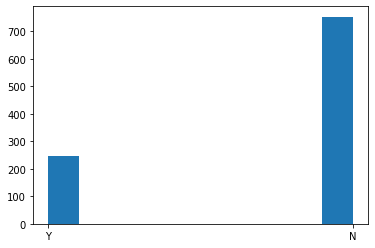

In [63]:
# Histogram Plot
plt.hist(df['fraud_reported'])

From above plot we can observe that Yes in our dataframe is less than No. On an approx Yes is around 250 and No is around 750.

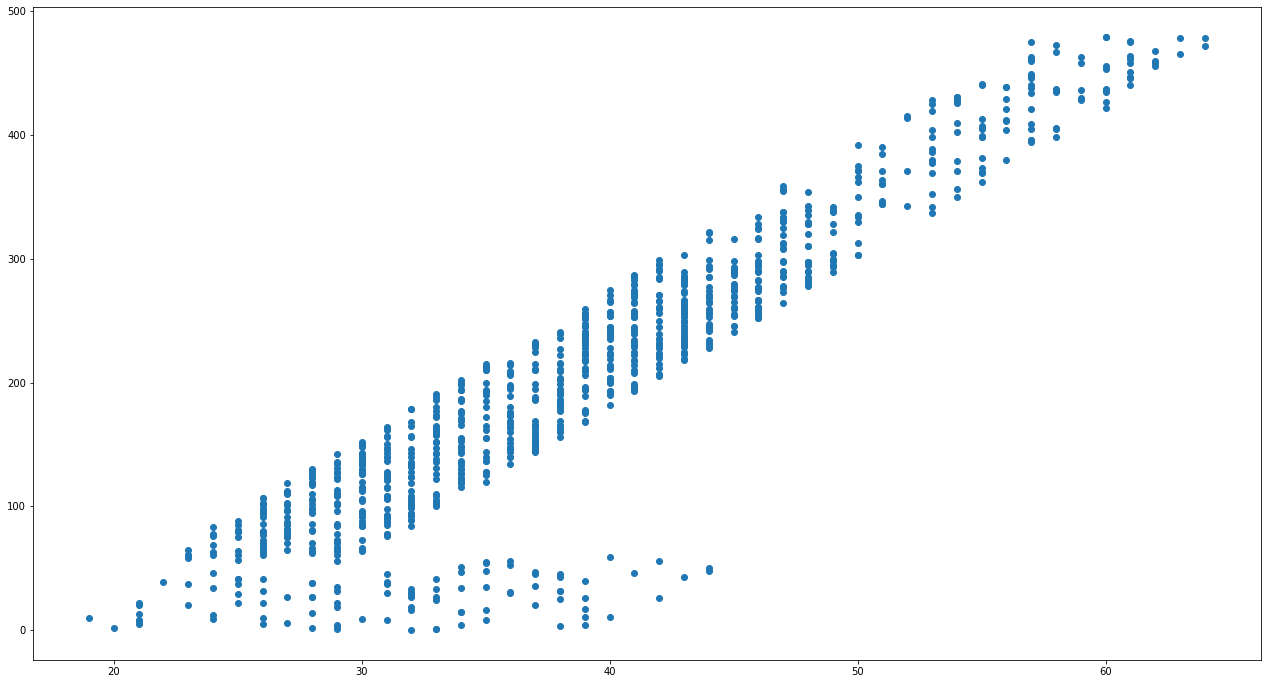

In [64]:
#Scattered Plot
plt.figure(figsize=[22,12])
plt.scatter(df['age'],df['months_as_customer'])

From above scatter plot we can observe the relation between age and the months of customer.

<BarContainer object of 1000 artists>

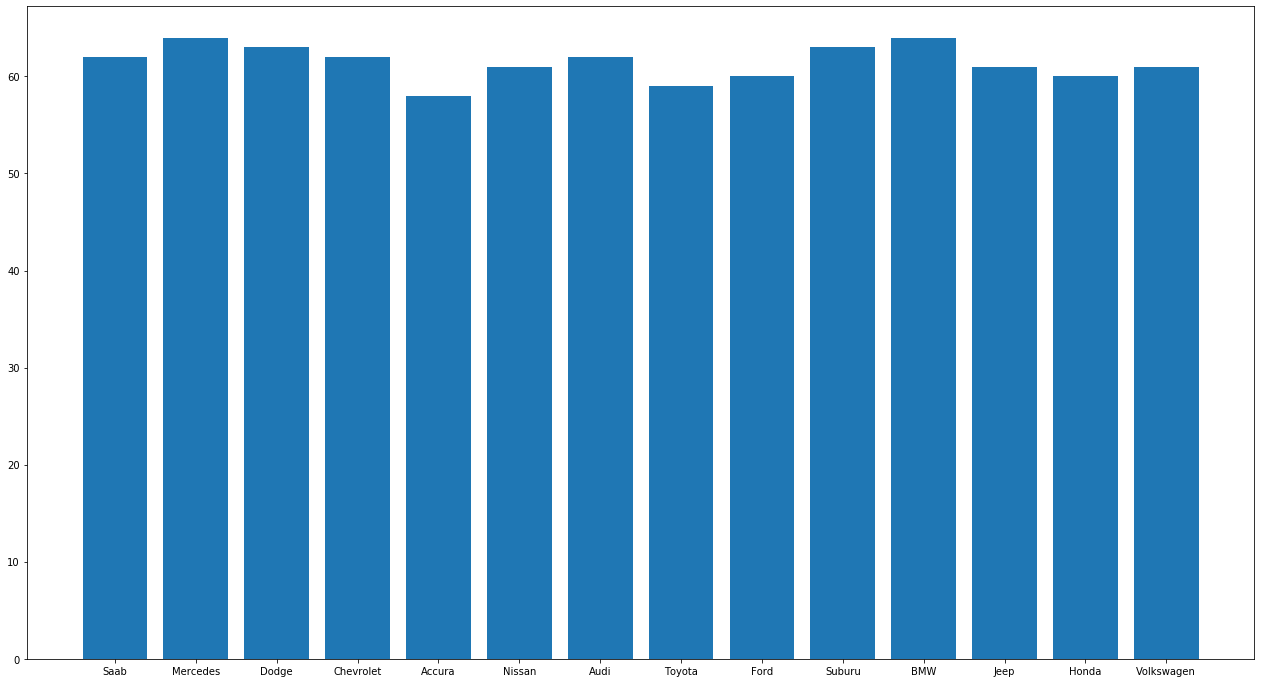

In [67]:
#Bar Graph
plt.figure(figsize=[22,12])
plt.bar(df['auto_make'],df['age'])

From above graph we can observe that Mercedes and BMW has the highest peak and Accura has the lowest. Likewise we can observe the other Auto make Companies and age relation. 

<BarContainer object of 1000 artists>

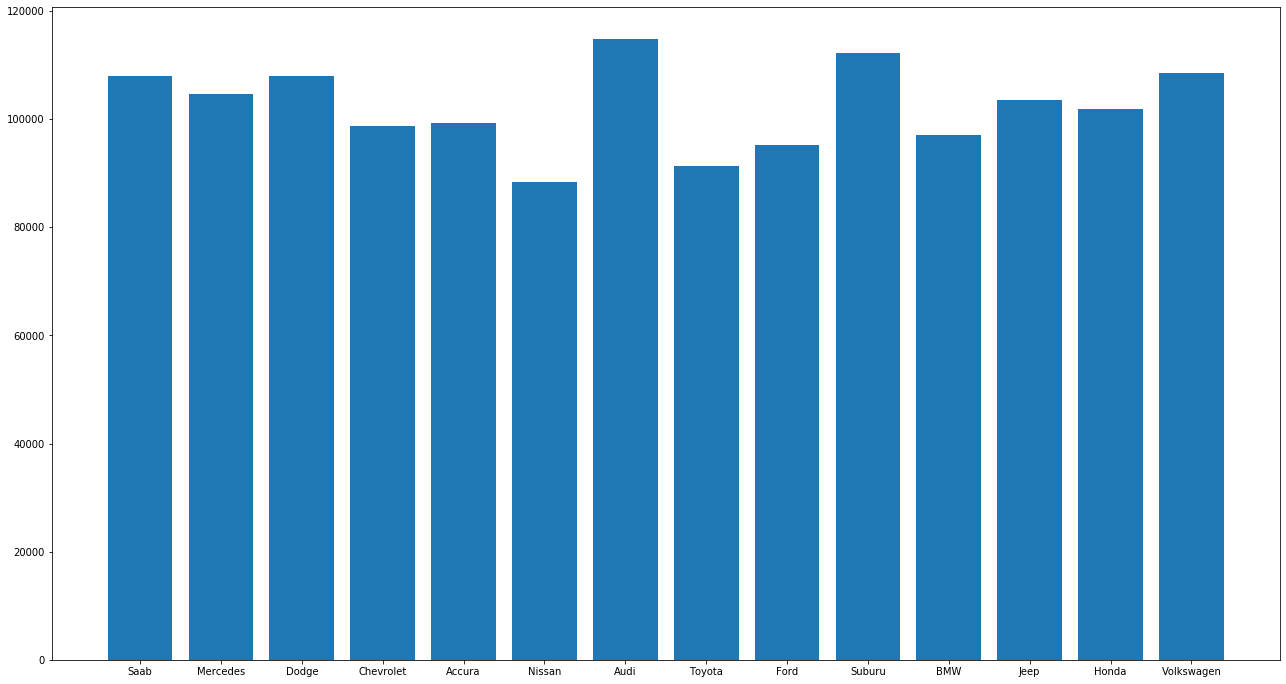

In [68]:
#Bar Graph
plt.figure(figsize=[22,12])
plt.bar(df['auto_make'],df['total_claim_amount'])

In this graph we can observe that Audi has the highest claim amount while Nissan has the lowest. 

# Label Encoding

Now we need to convert string values to numeric values so that our model can read the dataframe.

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [70]:
#Checking Improved DataFrame
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,53300,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,0,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,35100,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,48900,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,66000,...,0,1,0,6500,1300,650,4550,0,31,0


We can notice that all string values are converted to numeric values.

# Correlation

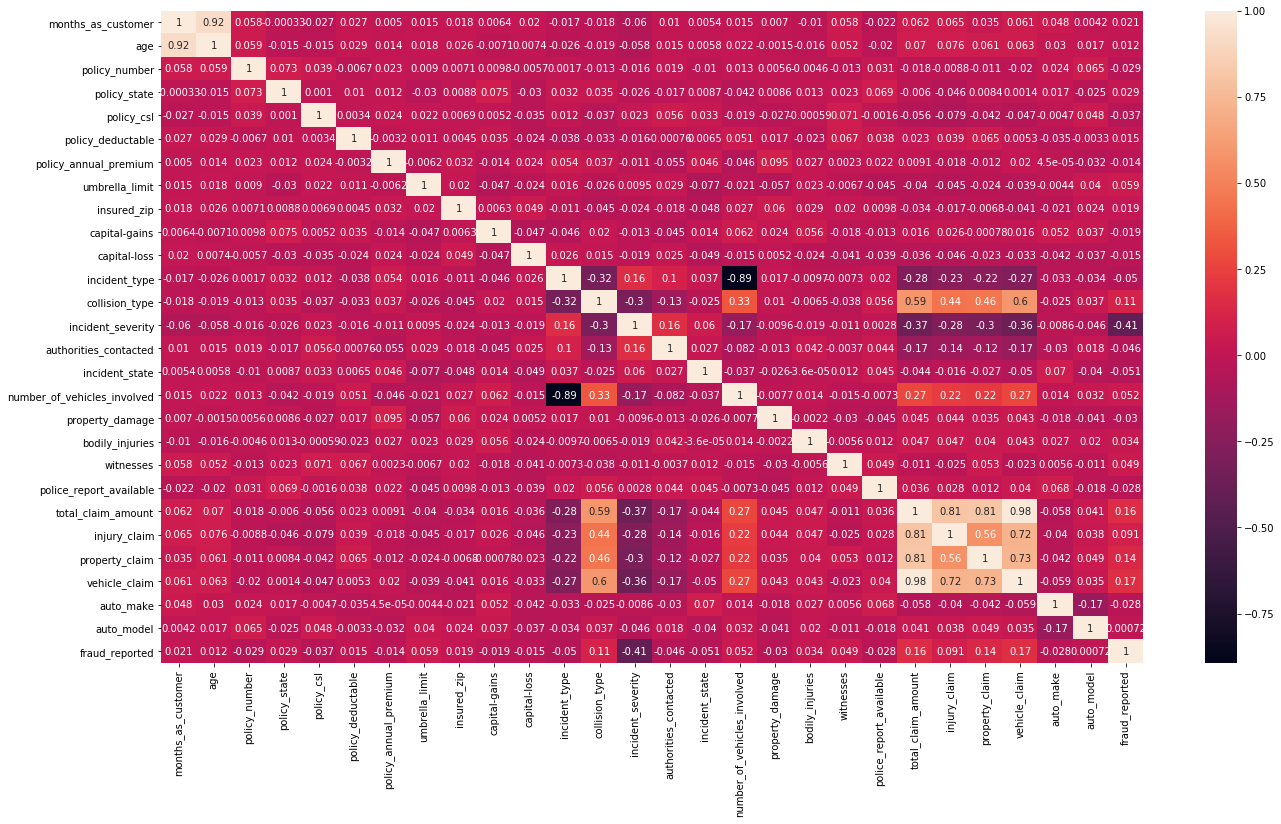

In [71]:
#Checking Correlation 
corr=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.show()

In [73]:
#Checking Correlation with respect to target column
corr['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
authorities_contacted         -0.045802
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
policy_state                   0.029432
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
collision_type                 0.110130
property_claim                 0.137835


auto_model has the best correlate with fraud_reported and incident_severity has the lowest correlation. 

In [74]:
#Checking Statistical information
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000


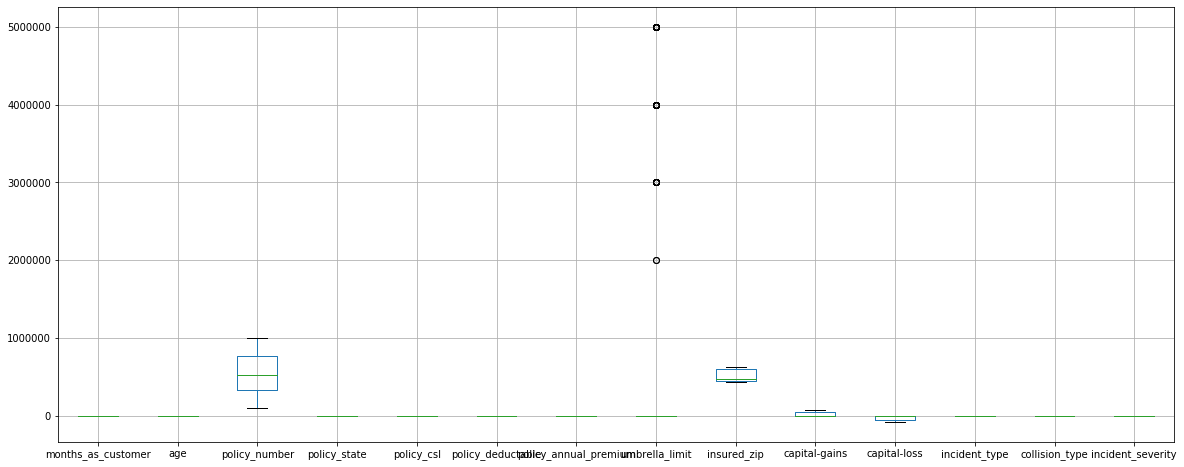

In [78]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:14].boxplot(figsize=[20,8])

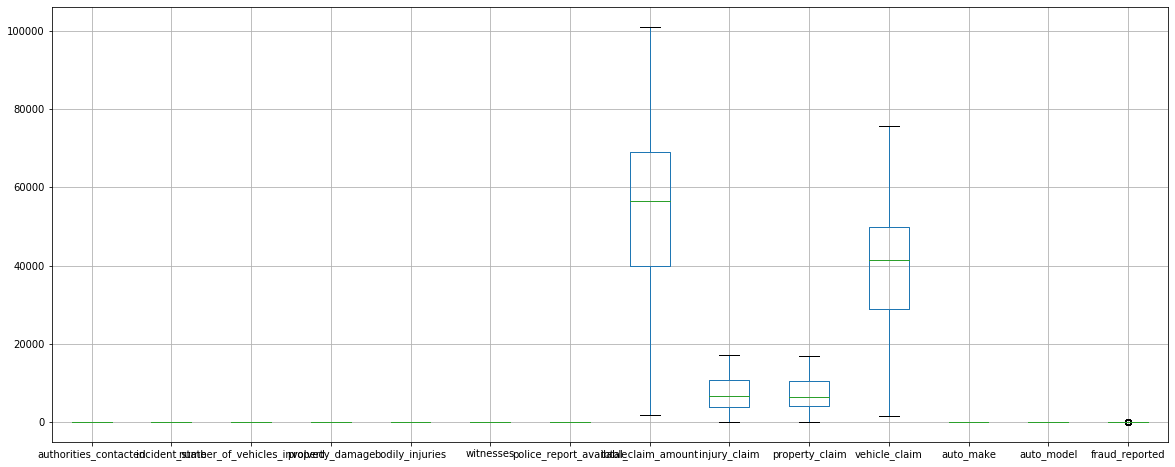

In [79]:
#Checking outliers with Boxplot Graph
df.iloc[:,14::].boxplot(figsize=[20,8])

In [80]:
#Improving Outliers
from scipy import stats
z=np.abs(stats.zscore(df))
df_new=(z<2).all(axis=1)
df=df[df_new]

In [81]:
#X,Y Split
X=df.drop('fraud_reported',axis=1)
Y=df['fraud_reported']

In [ ]:
# Checking Skewness
X.skew()

In [82]:
#Improving Skewness
from sklearn.preprocessing import power_transform
pt=power_transform(X, method='yeo-johnson')
X=pd.DataFrame(pt, columns=X.columns)
X.skew()

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


months_as_customer            -0.221351
age                           -0.050271
policy_number                 -0.174099
policy_state                  -0.146933
policy_csl                    -0.090134
policy_deductable              0.022771
policy_annual_premium         -0.031379
umbrella_limit                 7.375872
insured_zip                    0.000000
capital-gains                  0.106091
capital-loss                   0.025464
incident_type                 -0.146783
collision_type                -0.216010
incident_severity             -0.087598
authorities_contacted         -0.212672
incident_state                -0.231978
number_of_vehicles_involved    0.478147
property_damage               -0.123696
bodily_injuries               -0.106171
witnesses                     -0.165920
police_report_available        0.678458
total_claim_amount            -0.597676
injury_claim                  -0.485889
property_claim                -0.383619
vehicle_claim                 -0.571224


In [83]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score

In [84]:
#Finding Best Random State
maxAcc=0
maxRS=0
for i in range(1,100):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=i, test_size=0.3)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Best accuracy is', maxAcc,'on Random_state', maxRS)

Best accuracy is 0.7616279069767442 on Random_state 1
Best accuracy is 0.7906976744186046 on Random_state 2
Best accuracy is 0.8546511627906976 on Random_state 3
Best accuracy is 0.8604651162790697 on Random_state 50
Best accuracy is 0.8662790697674418 on Random_state 73


# Train-Test Split

In [85]:
#Train-Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=8, test_size=0.3)

# ML Algorithms

In [88]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predlr))
print('Confusion Matrix :', confusion_matrix(Y_test,predlr))
print('Classification Report :', classification_report(Y_test,predlr))

Accuracy Score : 0.8197674418604651
Confusion Matrix : [[131   5]
 [ 26  10]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.96      0.89       136
           1       0.67      0.28      0.39        36

    accuracy                           0.82       172
   macro avg       0.75      0.62      0.64       172
weighted avg       0.80      0.82      0.79       172



In [89]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,preddtc))
print('Confusion Matrix :', confusion_matrix(Y_test,preddtc))
print('Classification Report :', classification_report(Y_test,preddtc))

Accuracy Score : 0.6511627906976745
Confusion Matrix : [[99 37]
 [23 13]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.73      0.77       136
           1       0.26      0.36      0.30        36

    accuracy                           0.65       172
   macro avg       0.54      0.54      0.53       172
weighted avg       0.70      0.65      0.67       172



In [90]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predrfc))
print('Confusion Matrix :', confusion_matrix(Y_test,predrfc))
print('Classification Report :', classification_report(Y_test,predrfc))

Accuracy Score : 0.8197674418604651
Confusion Matrix : [[135   1]
 [ 30   6]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.99      0.90       136
           1       0.86      0.17      0.28        36

    accuracy                           0.82       172
   macro avg       0.84      0.58      0.59       172
weighted avg       0.83      0.82      0.77       172



In [91]:
#SVC Model
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predsvc))
print('Confusion Matrix :', confusion_matrix(Y_test,predsvc))
print('Classification Report :', classification_report(Y_test,predsvc))

Accuracy Score : 0.7906976744186046
Confusion Matrix : [[136   0]
 [ 36   0]]
Classification Report :               precision    recall  f1-score   support

           0       0.79      1.00      0.88       136
           1       0.00      0.00      0.00        36

    accuracy                           0.79       172
   macro avg       0.40      0.50      0.44       172
weighted avg       0.63      0.79      0.70       172



C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cross Validation Score

In [95]:
#Logistic Regression
from sklearn.model_selection import cross_val_score 
src1=cross_val_score(lr,X,Y,cv=5)
print('Cross Validation Score:', src1.mean())

Cross Validation Score: 0.7881311975591152


In [96]:
#Decision Tree Classifier
src2=cross_val_score(dtc,X,Y,cv=5)
print('Cross Validation Score:', src2.mean())

Cross Validation Score: 0.7354996186117467


In [93]:
#Random Forest Classifier
src3=cross_val_score(rfc,X,Y,cv=5)
print('Cross Validation Score:', src3.mean())

Cross Validation Score: 0.7968726163234172


In [94]:
#SVC
src4=cross_val_score(svc,X,Y,cv=5)
print('Cross Validation Score:', src4.mean())

Cross Validation Score: 0.7898398169336385


# Hyper Tuning Parameter

In [47]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['entropy','gini'], 'max_depth':np.arange(2,15)}
gcv=GridSearchCV(rfc,parameter,cv=5)
gcv.fit(X_train,Y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [97]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
accuracy_score(Y_test,predgcv)

0.9476744186046512

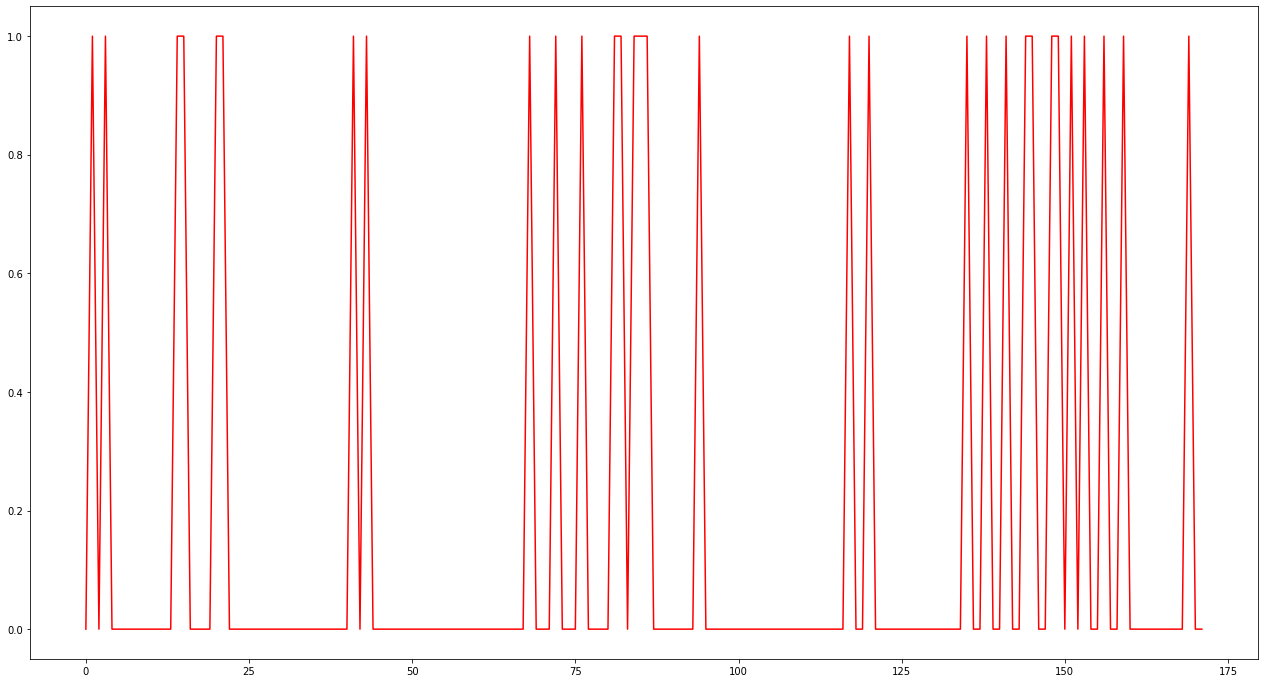

In [104]:
plt.figure(figsize=[22,12])
plt.plot(predgcv,color='r')
plt.show()

In [98]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Automobile_Insurance_Fraud_Prediction.pk1')

['Automobile_Insurance_Fraud_Prediction.pk1']

# Conclusion

In this project we have observed that Random Forest Classifier is the best fit model with accuracy score of 82%.

We also find some null values in the dataset which we have dropped the column.

We have also observed the correlation between target variable and independent variables.auto_model has the best correlate with fraud_reported and incident_severity has the lowest correlation. 

Some outliers are also observed in the datset which is aboved tried to remove successufully.

We also tried to understand the test prediction in graphical form. 